Dredging Tutorial 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

,Hs [m]
time,
2012-01-01 00:00:00,1.49262272910131
2012-01-01 01:00:00,1.5640411142480894
2012-01-01 02:00:00,1.609562005568361
2012-01-01 03:00:00,1.636151963909651
2012-01-01 04:00:00,1.6389448705755278


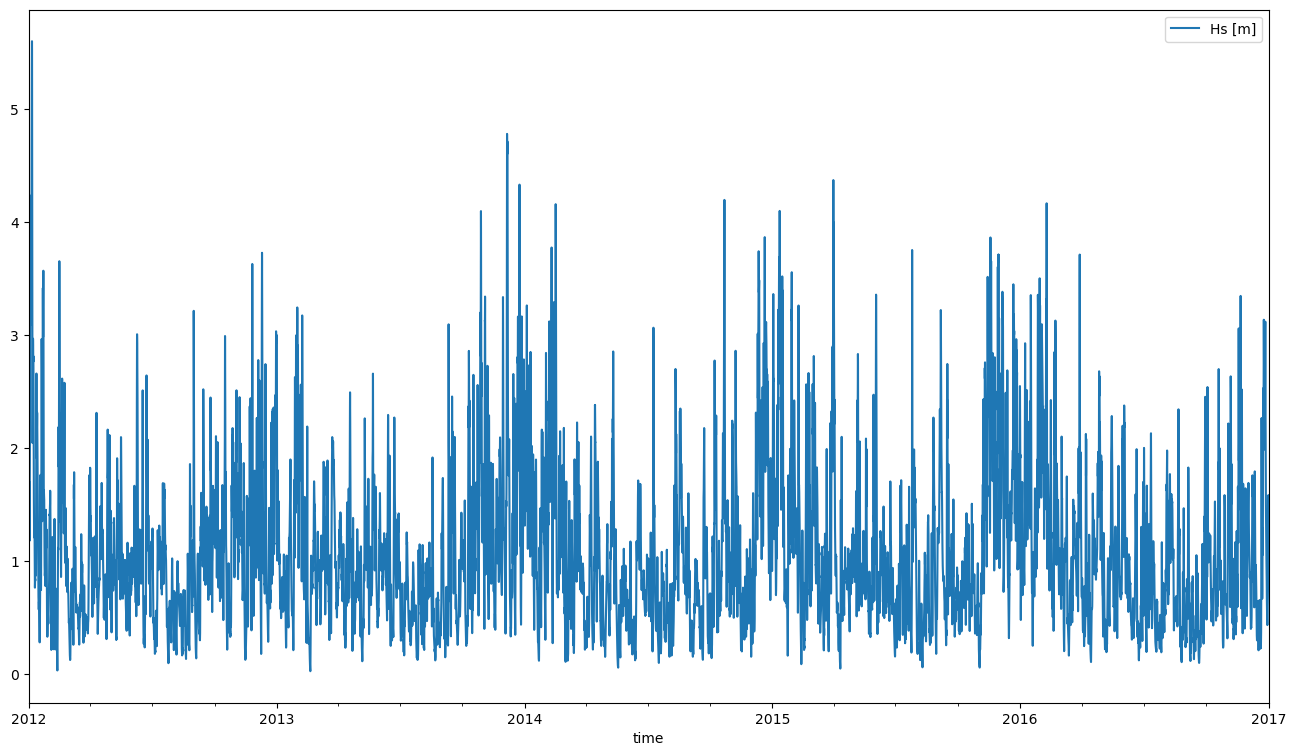

In [4]:
path = Path.cwd()
eurpfm = pd.read_csv(Path.joinpath(path, "Waves_Safe_Haven.csv"), delimiter = ',')
eurpfm['time'] = pd.to_datetime(eurpfm['time'], format='%Y-%m-%d %H:%M:%S')
eurpfm.set_index(['time'], inplace = True)

display(eurpfm.head(5))
eurpfm.plot(figsize=(16,9),subplots=True);

**1) Long Term Statistical Analysis**
\
Mean and Standard Deviation

In [5]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n", )

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

Mean
Hs [m]   1.061542415648853
dtype: float64 

Standard deviation
Hs [m]   0.687480264420601
dtype: float64


Monthly mean and Standard deviation

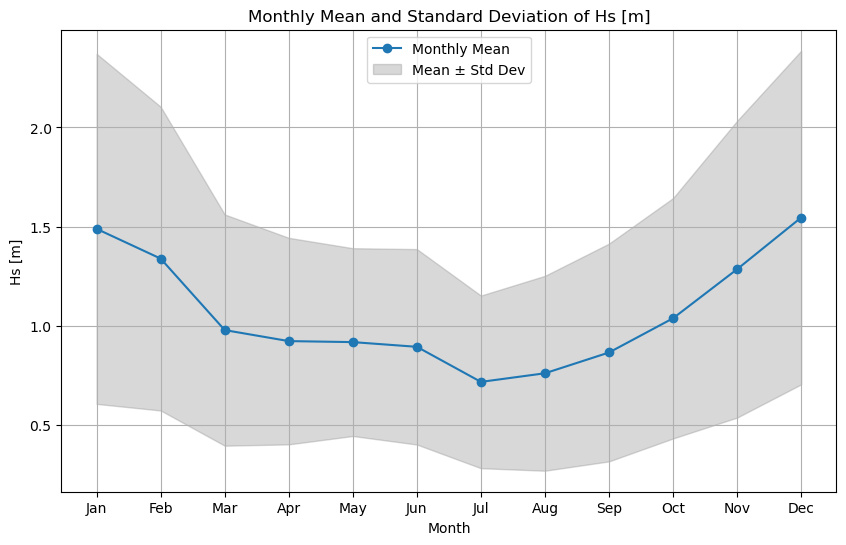

In [9]:
# Group by month (1-12) and calculate mean and std dev for each calendar month across all years
monthly_mean = eurpfm.groupby(eurpfm.index.month).mean()
monthly_std = eurpfm.groupby(eurpfm.index.month).std()

plt.figure(figsize=(10,6))
plt.plot(monthly_mean.index-1, monthly_mean['Hs [m]'], marker='o', label='Monthly Mean')
plt.fill_between(monthly_mean.index-1,
                 monthly_mean['Hs [m]'] - monthly_std['Hs [m]'],
                 monthly_mean['Hs [m]'] + monthly_std['Hs [m]'],
                 color='gray', alpha=0.3, label='Mean ± Std Dev')
plt.xticks(ticks=range(12), labels=months)
plt.xlabel('Month')
plt.ylabel('Hs [m]')
plt.title('Monthly Mean and Standard Deviation of Hs [m]')
plt.legend()
plt.grid(True)
plt.show()

**2)Long-Term assessment**
\
2.1 Workability

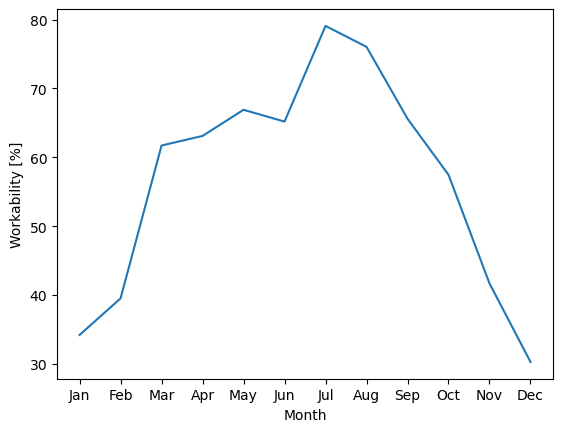

In [19]:
draught= 4  #CHANGE WITH BOATS
Hs_thres = 0.25 *draught  #CHANGE WITH BOAT DRAUGHT
work_ability = []

for month in range(1,12+1,1):
    data_month = eurpfm[eurpfm.index.month == month].copy()
    n_all = len(data_month)
    
    data_month = data_month[data_month['Hs [m]'] <= Hs_thres]
    n_workable = len(data_month)
    
    work_ability.append(n_workable/n_all*100)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(work_ability);
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

Downtime

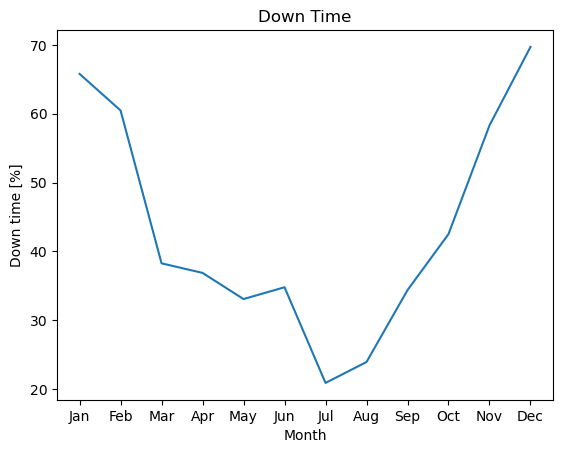

In [20]:
down_time = 100 - np.array(work_ability)

plt.plot(down_time)
plt.title('Down Time')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Down time [%]');

2.2) Presistency

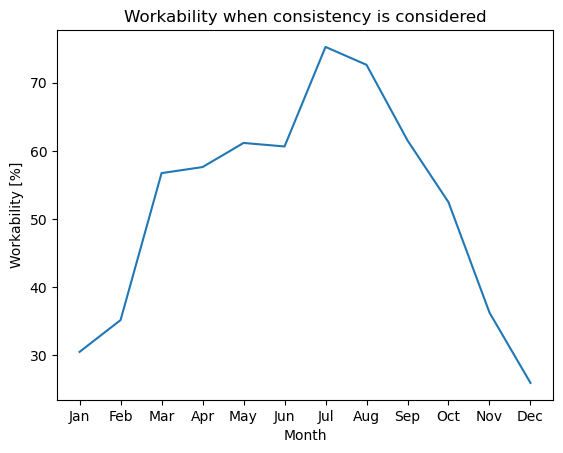

In [21]:
month_assessed = np.zeros(12)# an array that counts how many times each month is reviewed.
month_succes = np.zeros(12)# an array that will count the number of time 6 consequetive hours are occuring


for i in range(len(eurpfm)):
    period = eurpfm.iloc[i:i+6]
    
    month = period.index[0].month
    month_assessed[month-1] += 1# to zero-based

    Hs_serie = period['Hs [m]'].values.tolist()
 
    if np.max(Hs_serie) <= Hs_thres:    
        month_succes[month-1] += 1  # to zero-based
        #print(i, 'succes, Hs', np.max(Hs_serie))
    #else:
    #    print(i, 'not succes, Hs', np.max(Hs_serie), 'Wl min', np.min(WL_serie))

workability = month_succes/month_assessed*100

plt.plot(workability)
plt.title('Workability when consistency is considered')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

3) Work method strategy

|Site| Clay [m3] | Sand [m3]| Cemented Sand [m3] |
|----|-----------|----------|--------------------|
|Basin |300000 |450000 | 225000|    
|Channel | 0|248736/yr | 0|       

Maintenance Channel

In [34]:
wk = np.arange(1,53,1)
d= 8 # current and minimum navigational depth
maint_area = 220*1000 # area m2
S_acc = 250+260*d**1.4 * wk #[kg/yr/m]
print(S_acc)

[  5028.58515679   9807.17031358  14585.75547036  19364.34062715
  24142.92578394  28921.51094073  33700.09609751  38478.6812543
  43257.26641109  48035.85156788  52814.43672466  57593.02188145
  62371.60703824  67150.19219503  71928.77735181  76707.3625086
  81485.94766539  86264.53282218  91043.11797897  95821.70313575
 100600.28829254 105378.87344933 110157.45860612 114936.0437629
 119714.62891969 124493.21407648 129271.79923327 134050.38439005
 138828.96954684 143607.55470363 148386.13986042 153164.72501721
 157943.31017399 162721.89533078 167500.48048757 172279.06564436
 177057.65080114 181836.23595793 186614.82111472 191393.40627151
 196171.99142829 200950.57658508 205729.16174187 210507.74689866
 215286.33205544 220064.91721223 224843.50236902 229622.08752581
 234400.6726826  239179.25783938 243957.84299617 248736.42815296]


Basin Deepening

In [32]:
Deepen_Area = 200*750
Clay_vol = Deepen_Area * 2 # m3
Cemented_Sand_vol = Deepen_Area * 1.5 # m3
Sand_vol = Deepen_Area * 3 # m3
print('Clay volume [m3]:', Clay_vol)
print('Cemented Sand volume [m3]:', Cemented_Sand_vol)
print('Sand volume [m3]:', Sand_vol)

Clay volume [m3]: 300000
Cemented Sand volume [m3]: 225000.0
Sand volume [m3]: 450000


Land Reclamation